In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

plt.style.use('dark_background')

# A simple polyfit example

coef: [-5.03477732e+00  6.89020238e+01 -3.96054000e+02  1.24069517e+03
 -2.29662833e+03  2.54125723e+03 -1.61159577e+03  5.19675966e+02
 -5.97926019e+01 -9.00379026e-01]
error: 6.171712970037985e-19
r^2: 1.0


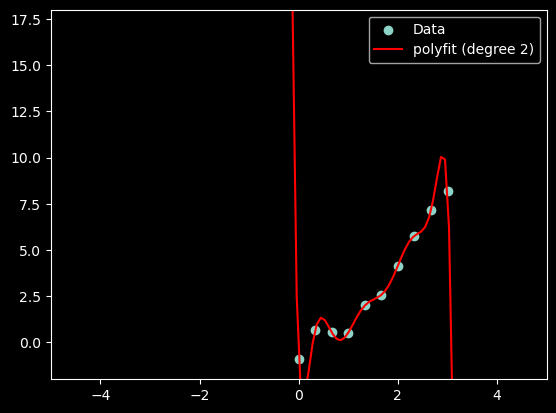

In [35]:
nPts = 10

x = np.linspace(0, 3, nPts)
y = x**2 + np.random.normal(0, 0.5, nPts)

degree = 9
coef = np.polyfit(x, y, degree)
print("coef:", coef)

poly_function = np.poly1d(coef)
pred  = poly_function(x)
error = ((y-pred)**2).sum()
print("error:", error)
print("r^2:", r2_score(y,pred))

x_values = np.linspace(-4, 4, 100)
y_values = poly_function(x_values)

plt.scatter(x, y, label='Data')
plt.plot(x_values, y_values, label='polyfit (degree 2)', color='red')

plt.xlim(-5,5);
plt.ylim(-2,18);
plt.legend();

# Getting some stats

In [34]:
nPts  = 10
nSamp = 10

data = []
for d in range(1,nPts):
    samp = []
    for i in range(nSamp):
        x = np.linspace(0, 3, nPts)
        y = x**2 + np.random.normal(0, 0.5, nPts)

        coef  = np.polyfit(x, y, d)
        poly_function = np.poly1d(coef)
        pred  = poly_function(x)
        error = ((y-pred)**2).sum()
        r2 = r2_score(y,pred)
        coef = np.append(coef, [error, r2])
        coef = np.flip(coef)
        
        samp.append(coef)
    # end
    data.append(samp)
# end

dfs = []
for i,d in enumerate(data):
    cols = ['r^2', 'error'] + list(range(i+2))
    df = pd.DataFrame(d, columns=cols)
    dfs.append(df)
    display(df.describe().iloc[1:3])
# end

,r^2,error,0,1
mean,0.900720,9.115721,-1.367876,3.011025
std,0.027377,2.387788,0.246780,0.119798


,r^2,error,0,1,2
mean,0.983607,1.477698,-0.167412,0.277252,0.917137
std,0.008667,0.747551,0.287708,0.650078,0.199671


,r^2,error,0,1,2,3
mean,0.986503,1.291939,0.012598,-0.607977,1.597566,-0.135058
std,0.009145,0.933816,0.400880,1.265145,0.920494,0.198709


,r^2,error,0,1,2,3,4
mean,0.987229,1.159818,0.109390,-0.391472,1.111011,0.090709,-0.030614
std,0.005925,0.547135,0.384032,2.936998,4.488206,2.329351,0.384021


,r^2,error,0,1,2,3,4,5
mean,0.989928,0.878317,0.038957,1.369218,-2.778399,3.365901,-1.202936,0.149046
std,0.005246,0.427036,0.338735,5.592748,14.660062,13.127300,4.822361,0.624148


,r^2,error,0,1,2,3,4,5,6
mean,0.992894,0.655727,0.163271,-1.285775,4.696002,-4.655527,2.671689,-0.706139,0.070605
std,0.009360,0.853697,0.400132,4.714874,20.521514,30.357816,19.745355,5.863259,0.650639


,r^2,error,0,1,2,3,4,5,6,7
mean,0.994872,0.451347,-0.238584,6.587478,-30.932437,56.328197,-47.839518,21.251987,-4.766703,0.426320
std,0.005398,0.457303,0.435663,6.510329,31.466374,63.478994,60.924102,29.784711,7.197842,0.683445


,r^2,error,0,1,2,3,4,5,6,7,8
mean,0.995979,0.323232,0.038839,2.069963,-16.261451,47.316793,-62.970478,45.923828,-18.715215,3.988586,-0.345510
std,0.005626,0.424327,0.574311,28.224377,196.631243,509.822295,657.914377,466.244928,184.352898,38.120341,3.210246


,r^2,error,0,1,2,3,4,5,6,7,8,9
mean,1.0,1.008692e-18,-0.065825,20.988301,-132.596544,339.915114,-465.402521,383.104082,-196.275367,61.332405,-10.684477,0.793408
std,0.0,1.206349e-18,0.656613,93.649791,732.951314,2210.476613,3468.101420,3152.965220,1722.342076,557.288927,98.369774,7.294561
